# Keras Basics

In [1]:
#!pip install tensorflow==2.0.0-beta1 

# 1. PlaidML-0.6 sadly does not work, yields nan as loss
# 2. Tensorflow 1.0 breaks when training in Jupyter

In [2]:
import tensorflow
from tensorflow import keras ## Use Keras from Tensorflow to work
import matplotlib.pyplot as plt

## Prepare Dataset

In [3]:
# Load Dataset (fashion MNIST)

fashion = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion.load_data()

X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

'T-shirt/top'

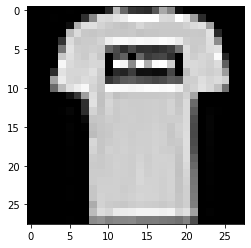

In [4]:
# https://github.com/zalandoresearch/fashion-mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.imshow(X_train_full[1], cmap='gray')
class_names[ y_train_full[1] ]

In [5]:
X_train_full[0].max(), X_train_full[0].min()  ## pixel from 0 -> 255, needs to scale it to 0 -> 1

(255, 0)

In [6]:
X_train_scaled = X_train_full.astype('float32')/255.0
X_train_scaled.dtype

dtype('float32')

## Define Model

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # So that we don't have to do .reshape(-1,1)
    keras.layers.Dense(300, activation="relu"),  # Hidden (1)
    keras.layers.Dense(100, activation="relu"),  # Hidden (2)
    keras.layers.Dense(10, activation="softmax") # Output Layer, 10 classes, decide with softmax
                                                 # Use sigmoid for 2
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# https://keras.io/losses/
# https://keras.io/optimizers/ 
# https://keras.io/metrics/

# sparse_categorical_crossentropy -- 1 target class, exclusive
# categorical_crossentropy -- Probability per class , keras.utils.to_categorical() to convert
# binary_crossentropy -- 2 classes
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd",
              metrics=["accuracy"])

## Training

In [10]:
X_valid, X_train = X_train_scaled[:5000], X_train_scaled[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

W0711 00:59:27.789554 4429465024 deprecation.py:323] From /usr/local/anaconda3/envs/hands-on-ml/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 34us/sample - loss: 0.7246 - accuracy: 0.7599 - val_loss: 0.5125 - val_accuracy: 0.8298
Epoch 2/30
55000/55000 [==============================] - 2s 28us/sample - loss: 0.4886 - accuracy: 0.8293 - val_loss: 0.4391 - val_accuracy: 0.8502
Epoch 3/30
55000/55000 [==============================] - 2s 28us/sample - loss: 0.4434 - accuracy: 0.8455 - val_loss: 0.4097 - val_accuracy: 0.8604
Epoch 4/30
55000/55000 [==============================] - 2s 28us/sample - loss: 0.4169 - accuracy: 0.8530 - val_loss: 0.4011 - val_accuracy: 0.8642
Epoch 5/30
55000/55000 [==============================] - 2s 28us/sample - loss: 0.3960 - accuracy: 0.8607 - val_loss: 0.3826 - val_accuracy: 0.8668
Epoch 6/30
55000/55000 [==============================] - 2s 28us/sample - loss: 0.3810 - accuracy: 0.8657 - val_loss: 0.3600 - val_accuracy: 0.8778
Epoch 7/30
55000/55000 [==============================] -

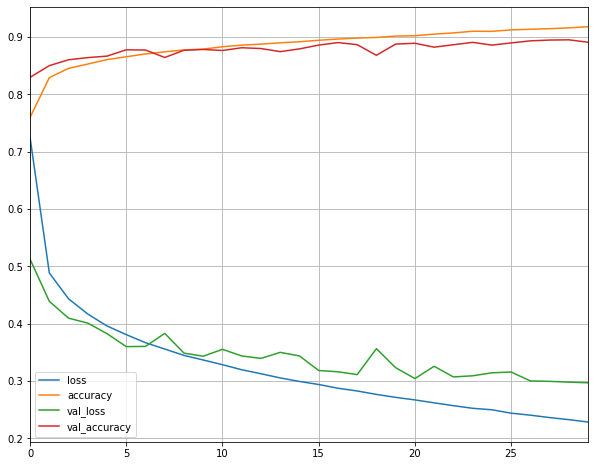

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.show()

In [19]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 18us/sample - loss: 2.4219 - accuracy: 0.8484


[2.4218556024551376, 0.8484]